In [89]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
from IPython.display import display, HTML
from openpyxl.workbook import Workbook
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import ast
import pickle

In [90]:
directory = r"C:\Users\usrymr851lw223\PycharmProjects\zhulong\data\E-Z 2021-09-30 17-18-47\Melodie Run Data"
filename_1 = rf"{directory}\dataframe_1.xlsx"
filename_2 = rf"{directory}\dataframe_2.xlsx"
filename_3 = rf"{directory}\dataframe_3.xlsx"
filename_3_r = rf"{directory}\dataframe_3_r.xlsx"

In [91]:
df1 = pd.read_excel(filename_1)
df1.set_index("round",inplace=True)
# display(df1)
df2 = pd.read_excel(filename_2)
df2.set_index("round",inplace=True)
# display(df2)
df3 = pd.read_excel(filename_3)
df3.set_index("round",inplace=True)
# display(df3)
df3r = pd.read_excel(filename_3_r)
df3r.set_index("round",inplace=True)
# display(df4)

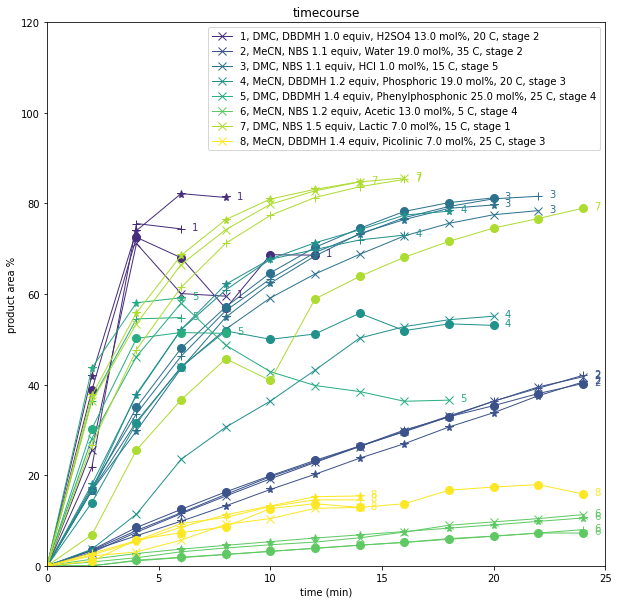

In [92]:
cmap = matplotlib.cm.get_cmap("viridis")
plt.figure(figsize=(10,10))
for i in range(1,9): 
    row1 = df1.loc[i]
    times1 = ast.literal_eval(row1["times"])
    values1 = ast.literal_eval(row1["values"])
    # print(times1, values1)
    row2 = df2.loc[i]
    times2 = ast.literal_eval(row2["times"])
    values2 = ast.literal_eval(row2["values"])
    # print(times2, values2)
    row3 = df3.loc[i]
    times3 = ast.literal_eval(row3["times"])
    values3 = ast.literal_eval(row3["values"])
    # print(times3, values3)
    row3r = df3r.loc[i]
    times3r = ast.literal_eval(row3r["times"])
    values3r = ast.literal_eval(row3r["values"])
    # print(times3, values3)
    
    color = cmap(i/8)
    label = f"{i}, {row1['solvent']}, {row1['reagent']} {row1['reagent equiv']:.1f} equiv, {row1['additive']} {row1['additive mol%']} mol%, {row1['temperature']} C, stage {row1['light stage']}"
    plt.plot(times1,values1,color=color,marker="x",linestyle="solid",linewidth=1,markersize=8,label=label)
    plt.plot(times2,values2,color=color,marker="o",linestyle="solid",linewidth=1,markersize=8)
    plt.plot(times3,values3,color=color,marker="+",linestyle="solid",linewidth=1,markersize=8)
    plt.plot(times3r,values3r,color=color,marker="*",linestyle="solid",linewidth=1,markersize=8)
    
    x1 = times1[-1]+0.5
    y1 = values1[-1]-0.25
    plt.annotate((i),(x1,y1),color=color)
    x2 = times2[-1]+0.5
    y2 = values2[-1]-0.25
    plt.annotate((i),(x2,y2),color=color)
    x3 = times3[-1]+0.5
    y3 = values3[-1]-0.25
    plt.annotate((i),(x3,y3),color=color)
    x3r = times3r[-1]+0.5
    y3r = values3r[-1]-0.25
    plt.annotate((i),(x3r,y3r),color=color)

plt.xlabel("time (min)")
plt.ylabel("product area %")
plt.title("timecourse")
plt.xlim(0,25)
plt.ylim(0,120)
plt.legend(loc="upper right")
plt.show()
    